In [1]:
# Basic Python package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re

In [2]:
# Load the TSV files
train_file_path = r'C:\Users\prits\Downloads\Data\ghc_train.tsv'
test_file_path = r'C:\Users\prits\Downloads\Data\ghc_test.tsv'

train_df = pd.read_csv(train_file_path, sep='\t')
test_df = pd.read_csv(test_file_path, sep='\t')

In [3]:
#To know are the columns in our dataset
# Columns: Assault on Human Dignity (hd), Calls for Violence (cv), Vulgarity/Offensive Language directed at an individual (vo)
train_df.columns

Index(['text', 'hd', 'cv', 'vo'], dtype='object')

In [4]:
#Top 10 rows in our dataset
train_df.head(10)

,text,hd,cv,vo
0,He most likely converted to islam due to his n...,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0
4,I am so ready to get back to blogging! www.ben...,0,0,0
5,taking a look at new opportunity called FX Pro...,0,0,0
6,Reflecting back when I was in school with Spec...,0,0,0
7,"Let's be honest everyone, last year there were...",0,0,0
8,2007 Nuke plant in Syria,0,0,0
9,NBC's Chuck Todd Thinks He's Figured It All Ou...,0,0,0


In [5]:
#Bottom 10 rows in our dataset
train_df.tail(10)

,text,hd,cv,vo
22026,What does Gab-Pro give ya?,0,0,0
22027,#354 TRUMP POLLS VS MEDIA MELTDOWN! | Jordan P...,0,0,0
22028,The Founders never EVER dealt with a group tha...,0,0,0
22029,Man [homosexually] molests 15-year-old boy on ...,0,0,0
22030,So I saw #Skyscraper for you #GabFam. Now I ha...,0,0,0
22031,"I'm a fan of western civilization, and one bed...",0,0,0
22032,Or ... is she saying that Muslims don't know h...,0,0,0
22033,Thank you to all my followers that follow me e...,0,0,0
22034,Wednesday music. https://www.youtube.com/watch...,0,0,0
22035,This is a really Big Surprise! https://www.wn...,0,0,0


In [6]:
#Describe function to find total count,etc
train_df.describe()

,hd,cv,vo
count,22036.000000,22036.000000,22036.000000
mean,0.084271,0.005945,0.062579
std,0.277800,0.076875,0.242210
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [7]:
#how many nulls 
print(train_df.isnull().sum())

text    0
hd      0
cv      0
vo      0
dtype: int64


In [7]:
#in our case we have no null values as inferred from output on line 12
#how does the data look like
print(train_df.shape)#total rows x column count 
print("\n")
print(train_df.dtypes)# each column data type

(22036, 4)


text    object
hd       int64
cv       int64
vo       int64
dtype: object


In [8]:
#finding duplicates
train_df.duplicated().sum()


72

In [9]:
test_df.duplicated().sum()

10

In [10]:
#output on line 27 shows our dataset has 72 duplicate values
#now to see which values are duplicate 
duplicate_rows = train_df[train_df.duplicated()]
print(duplicate_rows)


                                                    text  hd  cv  vo
3896                           I see what you did there.   0   0   0
5426                                                Lol!   0   0   0
5661   This is the amount of money necessary to buy t...   0   0   1
6036   Just posted 1st of 3 final 'controversial' (in...   0   0   0
6334                                            Maverick   0   0   0
...                                                  ...  ..  ..  ..
21122  GOD BLESS OUR INCREDIBLE PRESIDENT! RED TIDAL ...   0   0   0
21407                                                  .   0   0   0
21460                                       @Heartiste     0   0   0
21531                   Worst. Strategic. Mistake. EVER.   0   0   0
21976  SARA CARTER: John Kerry Officially Under Inves...   0   0   0

[72 rows x 4 columns]


In [11]:
# removing the duplicates and keeing just the first occurrence
train_df = train_df.drop_duplicates()

In [12]:
test_df = test_df.drop_duplicates()

In [13]:
#again checking for duplicates 
train_df.duplicated().sum()

0

In [14]:
test_df.duplicated().sum()

0

In [15]:
#output 0 on line 30 shows that now our dataset has no duplicate values 
#identifying garbage values (garbage values have "object" as their datatype)
for i in train_df.select_dtypes(include="object").columns:
    print(train_df[i].value_counts())
    print("***"*10)

'A confidential, 49-page memo for defeating Trump by working with the major social-media platforms to eliminate “right wing propaganda and fake news” was presented in January 2017  by Media Matters founder David Brock at a retreat in Florida with about 100 donors, the Washington Free Beacon reported at the time.' https://www.wnd.com/2018/08/mask-off-social-media-... #FAGS #So...    2
He most likely converted to islam due to his nature being suitable for  islamic doctrine. "Prophet" Muhammad was a psychopath.                                                                                                                                                                                                                                                                   1
The other way around! Just go to Birmingham or London!                                                                                                                                                                            

In [16]:
#Exploratory Data Analysis (EDA)
#descriptive statistics 
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hd,21964.0,0.084456,0.278077,0.0,0.0,0.0,0.0,1.0
cv,21964.0,0.005964,0.077000,0.0,0.0,0.0,0.0,1.0
vo,21964.0,0.062693,0.242416,0.0,0.0,0.0,0.0,1.0


In [17]:
train_df.describe(include="object")

,text
count,21964
unique,21963
top,"'A confidential, 49-page memo for defeating Tr..."
freq,2


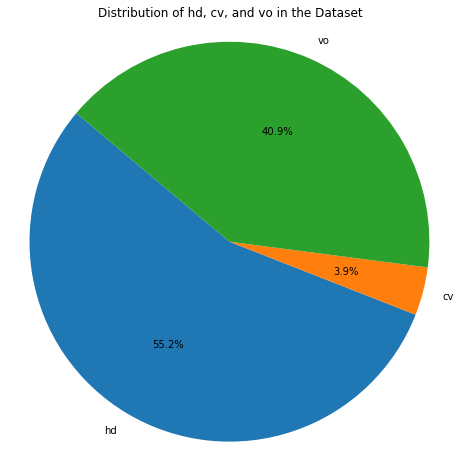

In [18]:
import matplotlib.pyplot as plt

# Sum the values of each column
hd_sum = train_df['hd'].sum()
cv_sum = train_df['cv'].sum()
vo_sum = train_df['vo'].sum()

# Create a list of sums and corresponding labels
sums = [hd_sum, cv_sum, vo_sum]
labels = ['hd', 'cv', 'vo']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of hd, cv, and vo in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


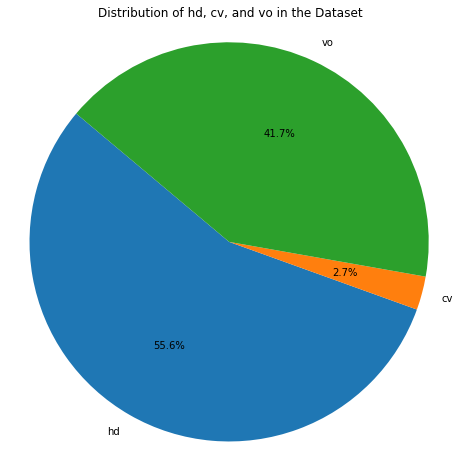

In [19]:
import matplotlib.pyplot as plt

# Sum the values of each column
hd_sum = test_df['hd'].sum()
cv_sum = test_df['cv'].sum()
vo_sum = test_df['vo'].sum()

# Create a list of sums and corresponding labels
sums = [hd_sum, cv_sum, vo_sum]
labels = ['hd', 'cv', 'vo']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of hd, cv, and vo in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Punctuation Removal

In [20]:
# Remove punctuations and symbols
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', "", string.punctuation))
    return text

# Apply the function to all string cells in the DataFrame
train_df = train_df.applymap(remove_punctuation)
print(train_df.head)

<bound method NDFrame.head of                                                     text  hd  cv  vo
0      He most likely converted to islam due to his n...   0   0   0
1      So Ford lied about being a psychologist Record...   0   0   0
2             Jobs Education Ending abuse of Nation CA43   0   0   0
3      I share a lot of your values  like many who do...   0   0   0
4      I am so ready to get back to blogging wwwbenbr...   0   0   0
...                                                  ...  ..  ..  ..
22031  Im a fan of western civilization and one bedro...   0   0   0
22032  Or  is she saying that Muslims dont know how t...   0   0   0
22033  Thank you to all my followers that follow me e...   0   0   0
22034  Wednesday music httpswwwyoutubecomwatchvfI2Z1l...   0   0   0
22035  This is a really Big Surprise  httpswwwwndcom2...   0   0   0

[21964 rows x 4 columns]>


In [21]:
#removing double quotes
import re

def remove_quotes(text):
    if isinstance(text, str):
        return re.sub(r'[“”]', '', text)
    else:
        return text

train_df = train_df.applymap(remove_quotes)


In [22]:
train_df['text'][14]

'Suggestion Create another channel not associated with General Shepherd  Post all the INFOWARS stuff but never use the word Alex Jones INFOWARS etc in titles and descriptions Instead use words that describe whats being talked about in the video'

# TOKENIZATION

In [23]:
import nltk
from nltk.tokenize import word_tokenize
# Download the necessary NLTK resources
nltk.download('punkt')
# Define a function to tokenize sentences
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    return text

# Apply the function to all cells in the DataFrame
train_df = train_df.applymap(tokenize_text)

# Display a few rows of the tokenized DataFrame
print(train_df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  hd  cv  vo
0  [He, most, likely, converted, to, islam, due, ...   0   0   0
1  [So, Ford, lied, about, being, a, psychologist...   0   0   0
2  [Jobs, Education, Ending, abuse, of, Nation, C...   0   0   0
3  [I, share, a, lot, of, your, values, like, man...   0   0   0
4  [I, am, so, ready, to, get, back, to, blogging...   0   0   0


# STOPWORDS REMOVAL 

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#stopwords are commonly used words in a language that are often ignored  or filtered out in natural language processing
#tasks beacuase they carry less meaningful information compared to other words
# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

# Define a function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([word for word in words if word.lower() not in stop_words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(remove_stopwords)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
train_df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)

# Process the test dataset in chunks
test_processed_chunks = []
for chunk in pd.read_csv(test_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    test_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for test data
test_df_cleaned = pd.concat(test_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned Train DataFrame:")
print(train_df_cleaned.head())

# Display a few rows of the cleaned test DataFrame
print("Cleaned Test DataFrame:")
print(test_df_cleaned.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'needn', 'shouldn', 'won', 'does', "should've", "weren't", 'yourself', 'do', 'my', 'about', 'can', 'too', 'don', 'being', 'under', 'she', 'themselves', 'if', "wasn't", 'myself', 'yours', 'your', 'be', 'have', 'ma', 'below', 'further', 'from', "didn't", 'doesn', "doesn't", 'more', 'ours', "needn't", 'over', 'again', 'isn', 'some', 'had', 'those', 'this', 'while', "haven't", 'having', 'how', 'itself', 'shan', 'before', 'down', 'each', "wouldn't", 'same', "won't", 'o', "mightn't", 'we', 'but', 'during', 'them', 'off', 'in', 'what', 'whom', 'only', 'who', 'm', 'most', 'didn', 't', 'these', 'just', 'him', 'of', 'were', 'for', 'where', 'aren', 'he', 'should', "you're", 'been', 'haven', 'not', "couldn't", 'with', "you'd", "it's", 'into', "don't", 'nor', 'no', 'on', 'as', 'by', 'our', 'theirs', 'which', "aren't", "mustn't", 'until', 'here', 'weren', 'to', 'an', 'because', 'i', 'herself', 'himself', 'out', 'the', 'd', 'is', 'will', 'did', 'such', 'you', "she's", 'both', 'hers', 'a', 'their', '

# STEMMING

In [25]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#Stemming is an NLP technique used to reducce words to their base or root form. 
#for eg, the words "running", "runner", and "ran" can all be reduced to the stem "run"

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Define a function to perform stemming
def stem_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(stem_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976  
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
train_df= pd.concat(train_processed_chunks, ignore_index=True)

# Process the test dataset in chunks
test_processed_chunks = []
for chunk in pd.read_csv(test_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    test_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for test data
test_df = pd.concat(test_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned Train DataFrame:")
print(train_df.head())

# Display a few rows of the cleaned test DataFrame
print("Cleaned Test DataFrame:")
print(test_df.head())


Cleaned Train DataFrame:
                                                text  hd  cv  vo
0  he most like convert to islam due to hi natur ...   0   0   0
1  so ford lie about be a psychologist . record s...   0   0   0
2           job . educ . end abus of nation . ca43 .   0   0   0
3  i share a lot of your valu , & like mani who d...   0   0   0
4  i am so readi to get back to blog ! www.benbri...   0   0   0
Cleaned Test DataFrame:
                                                text  hd  cv  vo
0  http : //www.youtube.com/watch ? v=kacwpkaktak...   0   0   0
1  veri nice ! i tend to get tire of the constant...   0   0   0
2      watch today . http : //circumcisionmovie.com/   0   0   0
3  `` think venu `` first color layer block in fi...   0   0   0
4  what about death penalti for perpetr and expel...   0   0   0


# LEMMITIZATION

In [26]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
#Lemmitization ia a NLP technique that invloves reducing words to thier base or dictionary form, known as the lemma. 
#eg: words: "running", "ran", "runs" ..... lemma:"run"
#eg: words: "better" (adjective).....lemma:"good"


import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization
def lemmatize_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([lemmatizer.lemmatize(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(lemmatize_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
train_df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)

# Process the test dataset in chunks
test_processed_chunks = []
for chunk in pd.read_csv(test_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    test_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for test data
test_df_cleaned = pd.concat(test_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned Train DataFrame:")
print(train_df_cleaned.head())

# Display a few rows of the cleaned test DataFrame
print("Cleaned Test DataFrame:")
print(test_df_cleaned.head())



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned Train DataFrame:
                                                text  hd  cv  vo
0  He most likely converted to islam due to his n...   0   0   0
1  So Ford lied about being a psychologist . Reco...   0   0   0
2  Jobs . Education . Ending abuse of Nation . CA...   0   0   0
3  I share a lot of your value , & like many who ...   0   0   0
4  I am so ready to get back to blogging ! www.be...   0   0   0
Cleaned Test DataFrame:
                                                text  hd  cv  vo
0  http : //www.youtube.com/watch ? v=kACWpKAKtak...   0   0   0
1  Very nice ! I tend to get tired of the constan...   0   0   0
2      Watch today . http : //circumcisionmovie.com/   0   0   0
3  `` Thinking Venues `` First Color Layer blocki...   0   0   0
4  What about death penalty for perpetrator and e...   0   0   0


In [28]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# File paths (already provided and loaded)
train_file_path = r'C:\Users\prits\Downloads\Data\ghc_train.tsv'
test_file_path = r'C:\Users\prits\Downloads\Data\ghc_test.tsv'

train_df = pd.read_csv(train_file_path, sep='\t')
test_df = pd.read_csv(test_file_path, sep='\t')

# Combine train and test datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Define a function to preprocess the text
def preprocess_text(text):
    if isinstance(text, str):
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize the text
        words = word_tokenize(text)
        # Remove stopwords and convert to lowercase
        words = [word.lower() for word in words if word.lower() not in stop_words]
        return words
    return []

# Apply preprocessing to the text column (assuming text column is named 'text')
combined_df['cleaned_text'] = combined_df['text'].apply(preprocess_text)

# Flatten the list of words
all_words = [word for words in combined_df['cleaned_text'] for word in words]

# Calculate word frequencies
word_freq = Counter(all_words)

# Display the most common words
common_words = word_freq.most_common(100)  # Adjust the number as needed
print(common_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('’', 2117), ('like', 1832), ('people', 1743), ('one', 1485), ('get', 1367), ('dont', 1358), ('trump', 1319), ('would', 1290), ('us', 1130), ('know', 1074), ('im', 989), ('time', 989), ('good', 986), ('think', 901), ('see', 882), ('right', 807), ('new', 800), ('want', 766), ('white', 756), ('go', 720), ('need', 706), ('even', 702), ('gab', 698), ('back', 697), ('going', 684), ('make', 673), ('never', 670), ('well', 650), ('way', 621), ('still', 581), ('really', 580), ('take', 575), ('”', 572), ('got', 568), ('“', 561), ('much', 556), ('say', 553), ('day', 545), ('twitter', 532), ('great', 531), ('world', 519), ('many', 511), ('cant', 495), ('could', 494), ('thats', 493), ('free', 488), ('shit', 471), ('jews', 466), ('first', 465), ('years', 461), ('man', 459), ('left', 458), ('also', 454), ('god', 453), ('thing', 446), ('love', 441), ('look', 436), ('news', 432), ('said', 425), ('america', 424), ('every', 422), ('today', 421), ('another', 418), ('president', 414), ('country', 412), ('

In [33]:

# Creating DataFrame
df = train_df

# Adding 'label' column
df['label'] = ((df['hd'] == 1) | (df['cv'] == 1) | (df['vo'] == 1)).astype(int)

print(df['label'][29])

1


# URL removal, hastags and mentions

In [34]:
# removing urls,hastags and mentions
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    return text

test_df['text'] = test_df['text'].apply(remove_urls_mentions_hashtags)
train_df['text'] = train_df['text'].apply(remove_urls_mentions_hashtags)

In [35]:
def remove_url(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

train_df['text'] = train_df['text'].apply(remove_url)

In [36]:
test_df['text'] = test_df['text'].apply(remove_url)

In [37]:
test_df.head()

,text,hd,cv,vo
0,A talk on natural law.,0,0,0
1,Very nice! I tend to get tired of the constant...,0,0,0
2,Watch today.,0,0,0
3,""" Thinking Venues "" First Color Layer blocking...",0,0,0
4,What about death penalty for perpetrators and...,0,0,0


In [38]:
# Function to check for URLs
def contains_url(text):
    url_pattern = re.compile(r'http\S+|www\S+|https\S+')
    return bool(url_pattern.search(text))


In [39]:
# Apply the function to the text column
test_df['contains_url'] = test_df['text'].apply(contains_url)

# Filter rows that contain URLs
rows_with_urls = test_df[test_df['contains_url']]

print("Rows with URLs:")
print(rows_with_urls)


Rows with URLs:
Empty DataFrame
Columns: [text, hd, cv, vo, contains_url]
Index: []


In [40]:
test_df.head(10)

,text,hd,cv,vo,contains_url
0,A talk on natural law.,0,0,0,False
1,Very nice! I tend to get tired of the constant...,0,0,0,False
2,Watch today.,0,0,0,False
3,""" Thinking Venues "" First Color Layer blocking...",0,0,0,False
4,What about death penalty for perpetrators and...,0,0,0,False
5,You have insecurities? Fuck you,0,0,0,False
6,Powerful Truths About Donald Trump the Media D...,0,0,0,False
7,Just saw an Oreo cookie commercial. Drool.,0,0,0,False
8,I bet a neural net with half a dozen nodes co...,0,0,0,False
9,"Country by country, the 'Prague Spring' that w...",0,0,0,False


# Emoji removal

In [38]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [41]:
#emoji removal
import pandas as pd
import emoji

# Load dataset from CSV file
#df = pd.read_csv('your_dataset.csv')

# Define a function to replace emoji codes with descriptive text
def replace_emojis(text):
    return emoji.demojize(text)

# Replace emoji codes in a specific column (e.g., 'text_column')
train_df['text'] = train_df['text'].apply(replace_emojis)
test_df['text'] = test_df['text'].apply(replace_emojis)

# Save the updated dataset to a new CSV file
#df.to_csv('updated_dataset.csv', index=False)


In [42]:
train_df.head(10)

,text,hd,cv,vo,label
0,He most likely converted to islam due to his n...,0,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0,0
4,I am so ready to get back to blogging! recipe...,0,0,0,0
5,taking a look at new opportunity called FX Pro...,0,0,0,0
6,Reflecting back when I was in school with Spec...,0,0,0,0
7,"Let's be honest everyone, last year there were...",0,0,0,0
8,2007 Nuke plant in Syria,0,0,0,0
9,NBC's Chuck Todd Thinks He's Figured It All Ou...,0,0,0,0


In [43]:
specific_text = train_df.loc[9, 'text']
print(specific_text) 

NBC's Chuck Todd Thinks He's Figured It All Out :grinning_squinting_face: 


In [44]:
specific_text = test_df.loc[16, 'text']
print(specific_text) 

:trophy: Precious Metals: 


In [45]:
train_df['text'] = train_df['text'].str.replace('_', '  ', regex=True) 

In [46]:
specific_text = train_df.loc[9, 'text']
print(specific_text) 

NBC's Chuck Todd Thinks He's Figured It All Out :grinning  squinting  face: 


# ABBREVIATION TREATMENT 

In [47]:
import pandas as pd
chat_words = {
    'AFAIK': 'As Far As I Know',
    'CA43': 'Californias 43rd congressional district',
    'FX': 'Foreign Exchange',
    'A.D.D': 'Attention Deficit Disorder',
    'NBC': 'National Broadcasting Company',
    'FB': 'Facebook',          
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',         
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What Its Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you (also a chat program)',
    'ILU': 'I Love You',
    'IMHO': 'In My Honest/Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My A.. Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The A..',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My A.. Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait...',
    '7K': 'Sick'
}

# Function to replace chat words in text
def replace_chat_words(text):
    for word, full_form in chat_words.items():
        text = text.replace(word, full_form)
    return text

# Applying the function to the 'text' column of the DataFrame
train_df['text'] = train_df['text'].apply(replace_chat_words)

# Display the updated DataFrame
print(train_df)

                                                    text  hd  cv  vo  label
0      He most likely converted to islam due to his n...   0   0   0      0
1      So Ford lied about being a psychologist. Recor...   0   0   0      0
2      Jobs. Education. Ending abuse of Nation. Calif...   0   0   0      0
3      I share a lot of your values, & like many who ...   0   0   0      0
4      I am so ready to get back to blogging!  recipe...   0   0   0      0
...                                                  ...  ..  ..  ..    ...
22031  I'm a fan of western civilization, and one bed...   0   0   0      0
22032  Or ... is she saying that Muslims don't know h...   0   0   0      0
22033  Thank you to all my followers that follow me e...   0   0   0      0
22034                                  Wednesday music.    0   0   0      0
22035                   This is a really Big Surprise!     0   0   0      0

[22036 rows x 5 columns]


# Lowercasing

In [48]:
train_df['text']=train_df['text'].str.lower()

In [49]:
train_df.tail()

,text,hd,cv,vo,label
22031,"i'm a fan of western civilization, and one bed...",0,0,0,0
22032,or ... is she saying that muslims don't know h...,0,0,0,0
22033,thank you to all my followers that follow me e...,0,0,0,0
22034,wednesday music.,0,0,0,0
22035,this is a really big surprise!,0,0,0,0


In [50]:
import pandas as pd
import numpy as np

train_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
null_counts = train_df.isnull().sum()

print(null_counts)


text     260
hd         0
cv         0
vo         0
label      0
dtype: int64


In [51]:
train_df = train_df.dropna().loc[(train_df['text'] != '[deleted]') & (train_df['text'] != '[removed]')]

In [52]:
# Remove punctuations and symbols
def remove_punctuation_and_special_chars(text):
    if isinstance(text, str):
        # Remove punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove specific unwanted characters
        special_chars = ['Â', 'â€Â', 'â€™']
        for char in special_chars:
            text = text.replace(char, '')
    return text

# Apply the function to all string cells in the DataFrame
train_df = train_df.applymap( remove_punctuation_and_special_chars)
print(train_df.head)


<bound method NDFrame.head of                                                     text  hd  cv  vo  label
0      he most likely converted to islam due to his n...   0   0   0      0
1      so ford lied about being a psychologist record...   0   0   0      0
2      jobs education ending abuse of nation californ...   0   0   0      0
3      i share a lot of your values  like many who do...   0   0   0      0
4      i am so ready to get back to blogging  recipes...   0   0   0      0
...                                                  ...  ..  ..  ..    ...
22031  im a fan of western civilization and one bedro...   0   0   0      0
22032  or  is she saying that muslims dont know how t...   0   0   0      0
22033  thank you to all my followers that follow me e...   0   0   0      0
22034                                   wednesday music    0   0   0      0
22035                    this is a really big surprise     0   0   0      0

[21776 rows x 5 columns]>


In [53]:
cleaned_train_file_path = r'C:\Users\prits\Downloads\Data\cleaned_ghc_train.csv'
cleaned_test_file_path = r'C:\Users\prits\Downloads\Data\cleaned_ghc_test.csv'

train_df.to_csv(cleaned_train_file_path, sep=',', index=False)
test_df.to_csv(cleaned_test_file_path, sep=',', index=False)